In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [43]:
df = pd.read_pickle('./saved-items/df.pkl')

df.head()

,Age,Simplified_Education,Relationship_Status,Income,Num_children,Has_child,years_joined,Total
0,64,Postgraduate,Alone,58138,0,False,9.189,1617
1,67,Postgraduate,Alone,46344,2,True,7.682,27
2,56,Postgraduate,In couple,71613,0,False,8.227,776
3,37,Postgraduate,In couple,26646,1,True,7.753,53
4,40,Postgraduate,In couple,58293,1,True,7.814,422


In [46]:
df.dtypes

Age                       int32
Simplified_Education     object
Relationship_Status      object
Income                    int32
Num_children              int64
Has_child                  bool
years_joined            float64
Total                     int64
dtype: object

In [52]:
# One Hot Encode Education column
df['Education'] = df['Simplified_Education'].apply(lambda x: 1 if x == "Postgraduate" else 0)
df['Child'] = df['Has_child'].apply(lambda x: 0 if x == False else 1)

# Label Encode the Relationship Status column
df['Single'] = df['Relationship_Status'].apply(lambda x: 1 if x == 'Alone' else 0)
df['Relationship'] = df['Relationship_Status'].apply(lambda x: 1 if x == 'In couple' else 0)

In [54]:
df.head(15)

,Age,Simplified_Education,Relationship_Status,Income,Num_children,Has_child,years_joined,Total,Education,Child,Single,Relationship
0,64,Postgraduate,Alone,58138,0,False,9.189,1617,1,0,1,0
1,67,Postgraduate,Alone,46344,2,True,7.682,27,1,1,1,0
2,56,Postgraduate,In couple,71613,0,False,8.227,776,1,0,0,1
3,37,Postgraduate,In couple,26646,1,True,7.753,53,1,1,0,1
4,40,Postgraduate,In couple,58293,1,True,7.814,422,1,1,0,1
5,54,Postgraduate,In couple,62513,1,True,8.175,716,1,1,0,1
6,50,Postgraduate,Alone,55635,1,True,8.997,590,1,1,1,0
7,36,Postgraduate,In couple,33454,1,True,8.515,169,1,1,0,1
8,47,Postgraduate,In couple,30351,1,True,8.436,46,1,1,0,1
9,71,Postgraduate,In couple,5648,2,True,7.668,49,1,1,0,1


In [55]:
X = df[['Age', 'Education', 'Single', 'Relationship', 'Income', 'Num_children', 'Child', 'years_joined', 'Total']]

In [56]:
X.head()

,Age,Education,Single,Relationship,Income,Num_children,Child,years_joined,Total
0,64,1,1,0,58138,0,0,9.189,1617
1,67,1,1,0,46344,2,1,7.682,27
2,56,1,0,1,71613,0,0,8.227,776
3,37,1,0,1,26646,1,1,7.753,53
4,40,1,0,1,58293,1,1,7.814,422


In [146]:
kmeans = KMeans(n_clusters=6)

In [147]:
kmeans.fit(X)

KMeans(n_clusters=6)

In [148]:
X['labels'] = kmeans.labels_

C:\Users\Johng\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
X.head()

,Age,Education,Single,Relationship,Income,Num_children,Child,years_joined,Total,labels
0,64,1,1,0,58138,0,0,9.189,1617,2
1,67,1,1,0,46344,2,1,7.682,27,5
2,56,1,0,1,71613,0,0,8.227,776,1
3,37,1,0,1,26646,1,1,7.753,53,0
4,40,1,0,1,58293,1,1,7.814,422,2


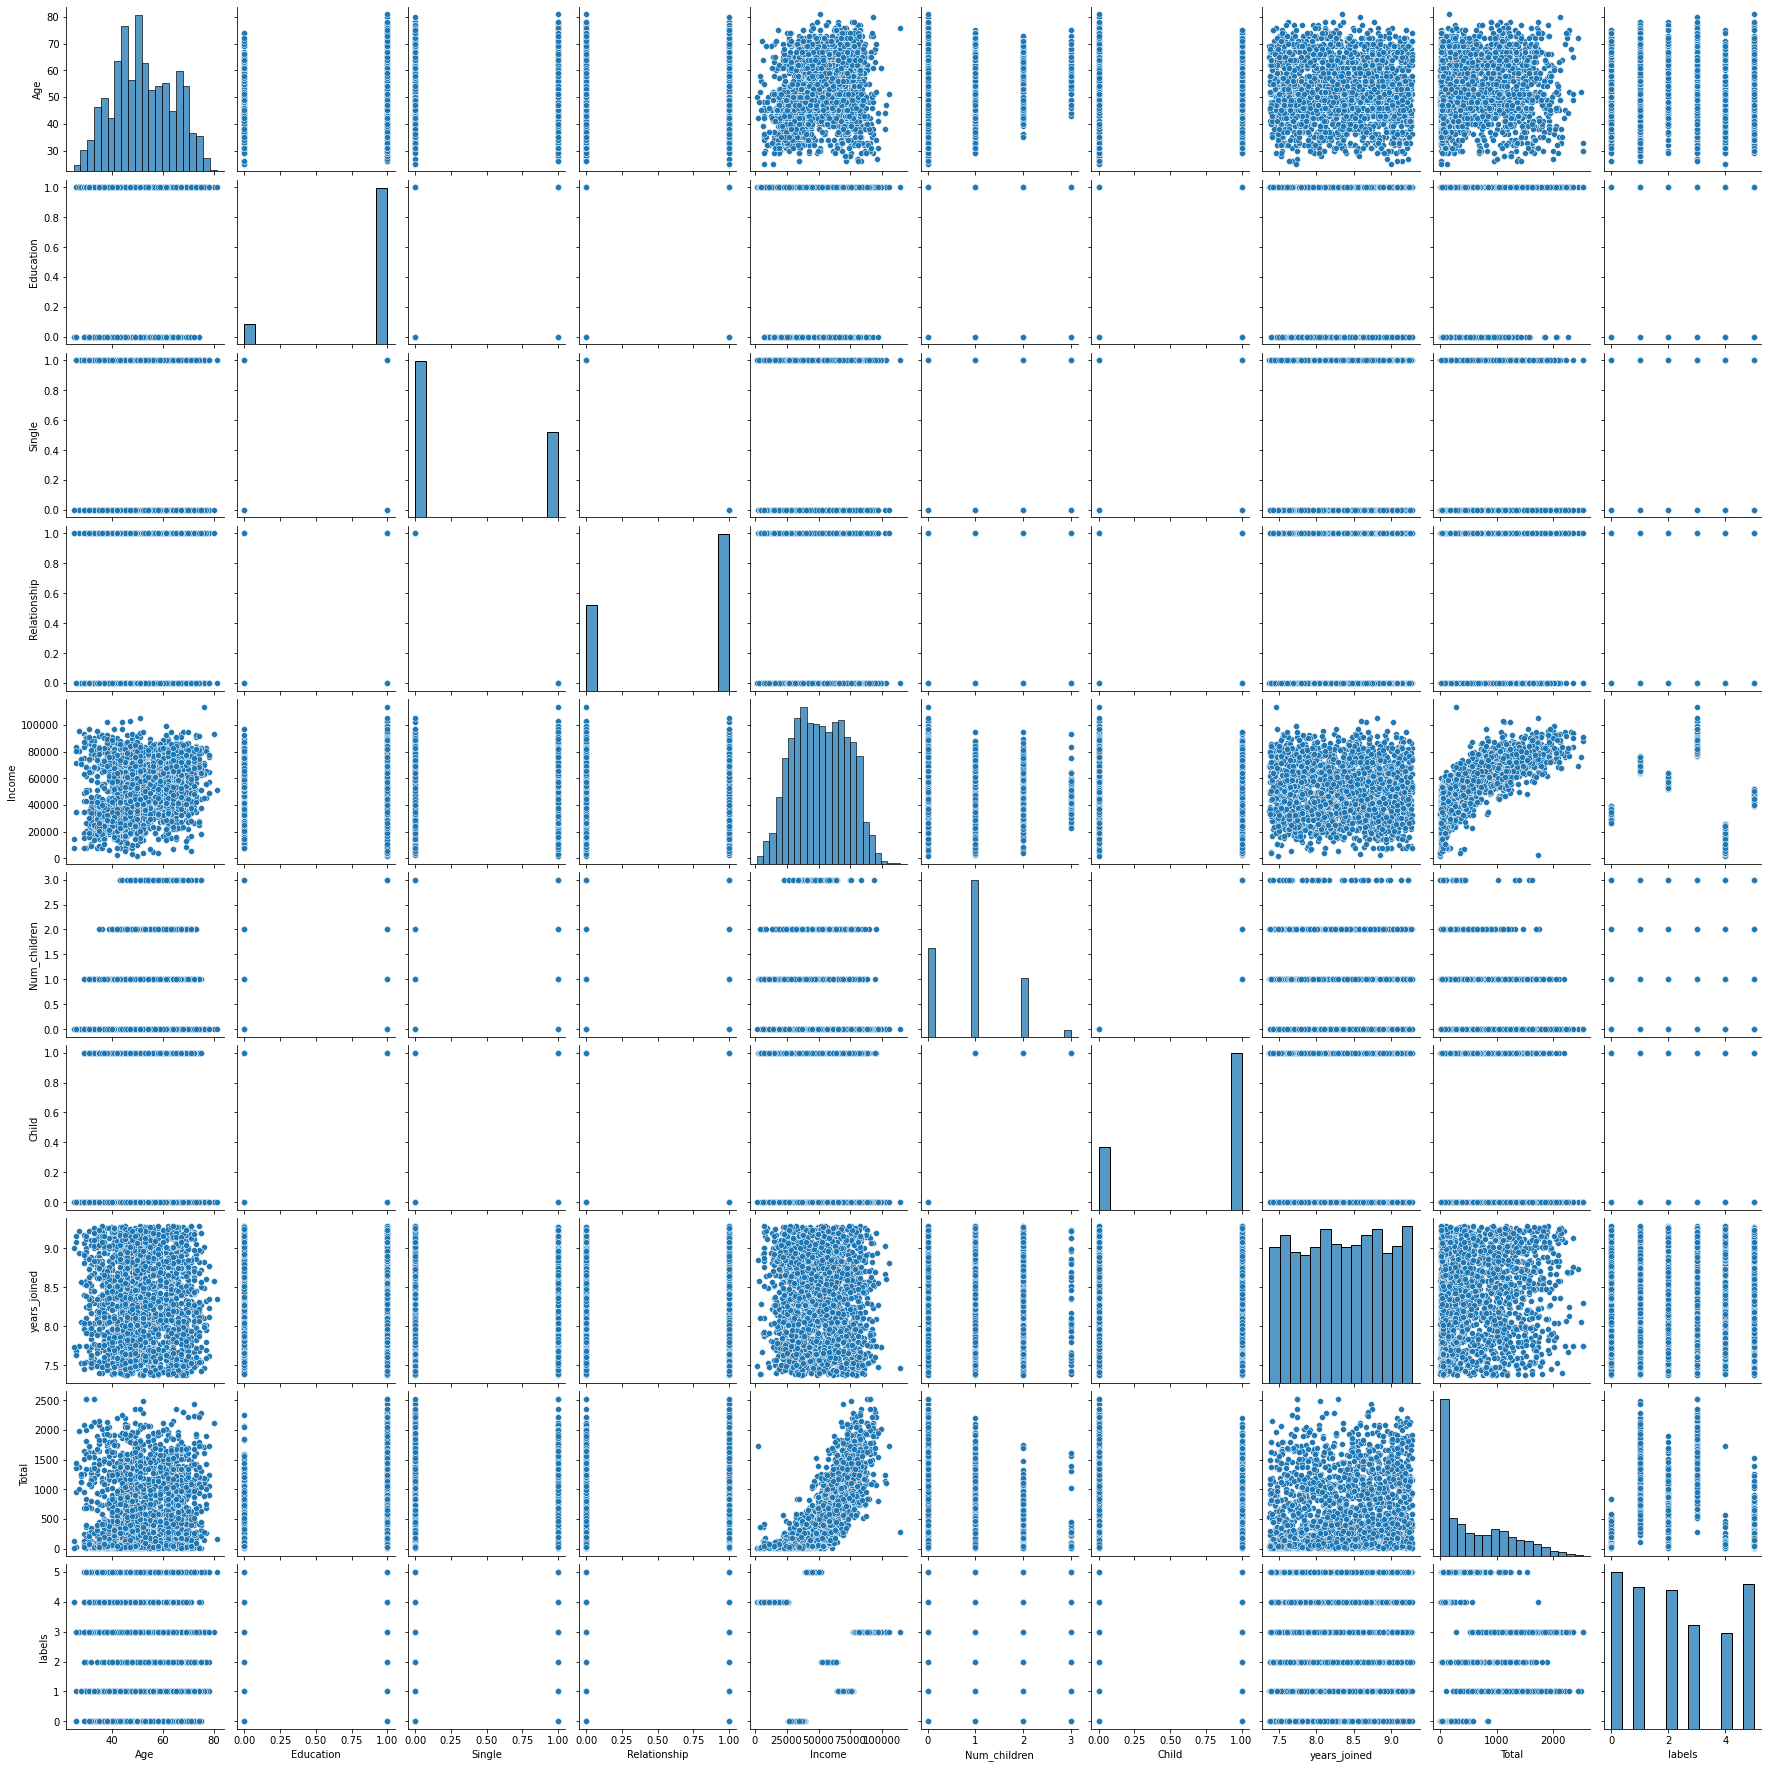

In [150]:
sns.pairplot(X)
plt.show()

In [151]:
zeros = X[X['labels'] == 0]
ones = X[X['labels'] == 1]
twos = X[X['labels'] == 2]
threes = X[X['labels'] == 3]
fours = X[X['labels'] == 4]

In [144]:
def plot_graphs(data):
    columns = data.columns.drop('labels')
    for col in columns:
        fig = px.histogram(data, col)
        fig.show()

In [145]:
plot_graphs(ones)